## **Project 3. The Adoption of EVs**
> **(Team 3) Lucas Perez, Sultan Raheem, Mahind Rao, Rachel Schoen | Data Engineering Track**

### I. **Introduction**
* *   * * 

**For this project, we sought to engineer a database to support the following types of analysis:**

- Regional EV Adoption and Characteristics:
    - Analyze the adoption of electric vehicles by city and county.
    - Study the characteristics of EVs (e.g., model, range, price) in different regions.

- Impact of Charging Infrastructure:
    - Correlate the presence and accessibility of charging stations with EV adoption rates.
    - Evaluate how the availability of charging infrastructure affects the usage patterns of EVs.

- Environmental Impact:
    - Analyze the relationship between EV adoption and carbon emissions in various regions.
    - Study how increased charging infrastructure relates to changes in emissions from facilities.
    - By integrating these datasets, the design allows for a comprehensive analysis of the factors influencing EV adoption, usage patterns, and the resulting environmental impacts, providing valuable insights for policymakers and stakeholders.

**This analysis can assist with answering the quetions**
- How does the presence and accessibility of electric vehicle (EV) charging infrastructure impact the adoption of EVs and contribute to reducing carbon emissions across different regions?
- How does the availability and accessibility of EV charging stations correlate with the adoption rates of electric vehicles in various counties?
- What is the relationship between the increase in the number of EV charging stations and the reduction in carbon emissions by facilities within those regions?

* *   * * 
> #### **Ethical Considerations**

Designing a database around the impact of EV charging infrastructure on EV adoption and carbon emissions across regions involves several ethical considerations:

1. **Privacy and Data Protection**: 
   - **Personal Data**: Ensure that any personally identifiable information (PII) collected, such as user demographics or specific location data, is anonymized or pseudonymized to protect individual privacy. This condition is fulfilled as vehicles are identified by their identification number (VIN), negating the need for any names or specific addresses of drivers that could potentially be leaked. By using county data as opposed to addresses, we are able to localize to slightly more generalized locations within a state population (Washington) without too much generalization that could skew the data.

2. **Bias and Fairness**:
   - **Data Bias**: Be aware of potential biases in the data collected, such as demographic biases in EV adoption rates or charging station accessibility. Take steps to mitigate biases to ensure fair analysis and conclusions.
   - **Algorithmic Bias**: If using algorithms for data analysis, ensure they are designed to avoid bias and to provide fair and equitable results across different demographic groups and regions.

3. **Transparency and Accountability**:
   - **Data Transparency**: Be transparent about the sources of data, methodologies used for analysis, and any assumptions made in the study. This transparency helps in validating the results and building trust in the findings.
   - **Accountability**: Take responsibility for the accuracy and implications of the data and analyses. Ensure that stakeholders can understand and question the methodologies and interpretations used in the database design.

4. **Environmental Impact**:
   - Consider the environmental impact of data collection and storage practices. Optimize database design and operations to minimize energy consumption and carbon footprint, especially if hosting large-scale databases and conducting extensive data analysis.

5. **Benefit and Harm**:
   - Assess the potential benefits and harms of the research and database usage. Ensure that the research contributes positively to understanding and addressing environmental challenges without causing harm to individuals or communities.

6. **Data Ownership and Governance**:
   - Clearly define data ownership and governance policies, especially if collaborating with multiple stakeholders or using data from different sources. Respect data ownership rights and ensure that data usage aligns with ethical guidelines and legal regulations.

7. **Public Interest and Impact**:
   - Consider the broader public interest and impact of the research and database findings. Ensure that the results are communicated accurately and responsibly to inform policy decisions and public discourse on EV adoption and carbon emissions reduction.

By addressing these ethical considerations during the design and implementation of the database, researchers and practitioners can ensure that their work is conducted ethically, respects privacy and fairness, and contributes positively to addressing environmental challenges associated with EV adoption and carbon emissions.
* *   * * 
> #### **Chosing SQL Database**
When deciding whether to choose a SQL database over a non-SQL (NoSQL) database, several factors come into play:

1. **Structured Data**: SQL databases are well-suited for structured data, which is typical in scenarios involving relational data such as geographical locations of charging stations, adoption rates of EVs, emission data over time, etc. The structured nature of SQL databases ensures that relationships between different types of data (e.g., charging station data, adoption rates, emissions data) can be easily defined and maintained.

2. **Complex Queries**: If our analysis involves complex queries that require joins across multiple tables or aggregations (e.g., calculating average adoption rates by region, correlating charging station density with emission reductions), SQL's powerful querying capabilities make it easier to perform such operations efficiently.

3. **Data Integrity and ACID Compliance**: SQL databases typically enforce ACID (Atomicity, Consistency, Isolation, Durability) properties, which ensure data integrity even in the event of system failures or concurrent access. This is crucial when handling data that needs to be accurate and consistent, especially in applications where data integrity is critical, such as research on environmental impact and policy decisions.

4. **Scalability for Structured Data**: While traditionally SQL databases were perceived as less scalable than NoSQL databases for large-scale data operations, modern SQL databases have evolved to handle large volumes of structured data efficiently. With proper indexing, partitioning, and clustering strategies, SQL databases can scale well for the size and complexity of data typically found in studies involving regional impact analysis.

5. **Maturity and Ecosystem**: SQL databases have been widely used for decades and have a mature ecosystem of tools, libraries, and support. This makes it easier to find expertise, integrate with other systems, and ensure long-term maintenance and scalability of the database.

In summary, for a database focused on analyzing the impact of EV charging infrastructure on EV adoption and carbon emissions across different regions, choosing a SQL database would typically be advantageous due to its suitability for handling structured data, supporting complex queries, ensuring data integrity, and leveraging a mature ecosystem of tools and support.

### II. **Database Design**
* *   * * 

The following is the ERD diagram of our database.

![Image of ERDV](https://i.imgur.com/LPKG7UE.png)

**Tables and Relationships**


**city_dataset**

- Columns: city_id, city
- Description: Contains unique city identifiers and city names.
- Relationships:
    - Linked to Electric_Vehicle_Population_Data through city.
    - Linked to ghgp_data_carbon_2022 through city.
    - Linked to EV_Alternative_Fuel_Charging_Stat through city.
    

**county_dataset**
- Columns: county_id, county
- Description: Contains unique county identifiers and county names.
- Relationships:
    - Linked to Electric_Vehicle_Population_Data through county.
    - Linked to ghgp_data_carbon_2022 through county.

**Electric_Vehicle_Population_Data**
- Columns: VIN, County, City, States, Zip_Code, Model_Year, Make, Model, Electric_Vehicle_Type, CAFV_Eligibility, Electric_Range, Base_MSRP, Electric_Utility
- Description: Contains detailed information about electric vehicles, including their unique identifier (VIN), location, make, model, type, eligibility for incentives, range, price, and utility provider.
- Relationships:
    - Linked to county_dataset through county.
    - Linked to city_dataset through city.

**ghgp_data_carbon_2022**
- Columns: Facility_Id, City, States, Address, County, Industry_Type_Sectors, Total_reported_direct_emissions, CO2_emissions_nonbiogenic, Methane_CH4_emissions
- Description: Contains data on greenhouse gas emissions by facility, including emissions data for CO2 and methane, location information, and industry type.
- Relationships:
    - Linked to county_dataset through county.
    - Linked to city_dataset through city.

**EV_Alternative_Fuel_Charging_Stat**
- Columns: Unique_id, Station_Name, Street_Address, City, States, Zip_Code, Groups_With_Access_Code, Access_Days_Time, Geocode_Status, Latitude, Longitude, Date_Last_Confirmed, ID, Updated_At, Open_Date
- Description: Contains information about electric vehicle charging stations, including their unique identifier, name, address, accessibility, location coordinates, and operational status.
- Relationships:
    - Linked to city_dataset through city.

**Key Points**
- Electric_Vehicle_Population_Data is linked to the county_dataset and city_dataset to associate vehicle data with specific locations.
- ghgp_data_carbon_2022 is linked to the county_dataset and city_dataset to relate carbon emissions data to specific counties and cities.
- EV_Alternative_Fuel_Charging_Stat is linked to the city_dataset to associate charging station data with specific cities.

### III. **Data and Delivery**
* *   * * 

##### **1. Data Preparation**

Before we could load the data into tables, we first had to clean the datasets given to us.

Because our datasets were CSV files that were already fairly clean to begin with, we initally opted to clean the data manually via Excel.

To clean the data, we renamed some headers and removed some extra data that we deemed to be unnecessary to the question we were trying to answer.
* *   * * 

##### **2. Data Validation using Pydantic**


Ensuring data quality is a crucial step in any data engineering project, especially when applying the skill outside of the classroom. Ultimately, the goal of any data collection is for stakeholders to make strategic business decisions. If the quality of data is subpar, then inaccurate values can lead to poor decisions being made due to incorrect and inaccurate data. It should not come as a surprise that as data scientists, we seek to avoid this outcome.

Our original datasets from Kaggle and the US Census are all single flat file CSVs. Validating this data can be tricky, and it took considerable research to decide how to approach this aspect of the project. Ultimately, we decided to use Pydantic for its automated testing, for the purpose of validating, profiling and documenting our data. The aim was to catch any presence of null or unclean data missed in the manual cleaning, and to test, validate and document data quality issues using Pydantic.

**Initializing the Pydantic Workspace**

First, if Pydantic isn't already installed on the system, you must install Pydantic.

Using `pip install pydantic` in the terminal should be sufficient.

Next, we define a Pydantic model that represents our data schema. Pydantic will help to validate the structure and types of the data.

In [19]:
import pandas as pd
from pydantic import BaseModel
from typing import List

##### **Deploy Pydantic**

**Validate the ghgp_data_carbon_2022.csv**

In [20]:
# Validating ghgp_data_carbon_2022.csv

class CarbonData(BaseModel):
    County: str
    Total_reported_direct_emissions: float
    Facility_Id: float
    States: str
    Zip_Code: float
    Address: str
    Industry_Type_Sectors: str
    CO2_emissions_nonbiogenic: float
    Methane_CH4_emissions: float

# Defining Function for Pydantic Validation

def read_csv_with_pydantic(file_path: str) -> List[CarbonData]:
    df = pd.read_csv(file_path)
    data = []
    for index, row in df.iterrows():
        try:
            record = CarbonData(**row.to_dict())
            data.append(record)
        except Exception as e:
            print(f"Error processing row {index}: {e}")
    return data


# Using the function and Pydantic to validate
file_path = 'resources/ghgp_data_carbon_2022.csv'
carbon_data = read_csv_with_pydantic(file_path)
for record in carbon_data:
    print(record)

County='Adams' Total_reported_direct_emissions=112190.008 Facility_Id=1002804.0 States='WA' Zip_Code=99344.0 Address='1201 N BROADWAY AVE' Industry_Type_Sectors='Other,Waste' CO2_emissions_nonbiogenic=50977.4 Methane_CH4_emissions=61184.0
County='Adams' Total_reported_direct_emissions=75786.162 Facility_Id=1002287.0 States='WA' Zip_Code=99344.0 Address='100 LEE STREET' Industry_Type_Sectors='Other,Waste' CO2_emissions_nonbiogenic=55798.3 Methane_CH4_emissions=19937.5
County='Benton' Total_reported_direct_emissions=142910.896 Facility_Id=1004236.0 States='WA' Zip_Code=99337.0 Address='227515 E BOWLES ROAD' Industry_Type_Sectors='Chemicals' CO2_emissions_nonbiogenic=9554.8 Methane_CH4_emissions=0.5
County='Benton' Total_reported_direct_emissions=81536.458 Facility_Id=1000614.0 States='WA' Zip_Code=99352.0 Address='2013 SAINT STREET' Industry_Type_Sectors='Other,Waste' CO2_emissions_nonbiogenic=59802.9 Methane_CH4_emissions=21660.25
County='Benton' Total_reported_direct_emissions=29923.78

**Validate the EV_Alternative_Fuel_Charging_Stations.csv**

In [21]:
# Validating EV_Alternative_Fuel_Charging_Stations.csv

class StationData(BaseModel):
    Unique_id: float
    Station_Name: str
    Street_Address: str
    City: str
    States: str
    Zip_Code: int
    Groups_With_Access_Code: str
    Access_Days_Time: str
    Geocode_Status: str
    Latitude: float
    Longitude: float
    Date_Last_Confirmed: str
    Updated_At: str
    Open_Date: str

# Defining Function for Pydantic Validation

def read_csv_with_pydantic(file_path: str) -> List[StationData]:
    df = pd.read_csv(file_path)
    data = []
    for index, row in df.iterrows():
        try:
            record = StationData(**row.to_dict())
            data.append(record)
        except Exception as e:
            print(f"Error processing row {index}: {e}")
    return data

# Using the function and Pydantic to validate
file_path = 'resources/EV_Alternative_Fuel_Charging_Stations.csv'
station_data = read_csv_with_pydantic(file_path)
for record in station_data:
    print(record)

Unique_id=102483.0 Station_Name='Aberdeen, WA - Tesla Supercharger' Street_Address='416 Wishkah Street' City='Aberdeen' States='WA' Zip_Code=98520 Groups_With_Access_Code='Public' Access_Days_Time='24 hours daily; for Tesla use only' Geocode_Status='GPS' Latitude=46.976679 Longitude=-123.813485 Date_Last_Confirmed='2021-10-11' Updated_At='2021-11-04 18:37:47 UTC' Open_Date='2017-01-15'
Unique_id=191770.0 Station_Name='Walmart 2037 (Aberdeen, WA)' Street_Address='909 E Wishkah St' City='Aberdeen' States='WA' Zip_Code=98520 Groups_With_Access_Code='Public' Access_Days_Time='24 hours daily' Geocode_Status='GPS' Latitude=46.976416 Longitude=-123.807081 Date_Last_Confirmed='2022-07-25' Updated_At='2022-07-25 01:36:20 UTC' Open_Date='2021-07-03'
Unique_id=155375.0 Station_Name='STCU Airway Heights' Street_Address='10811 US-2' City='Airway Heights' States='WA' Zip_Code=99001 Groups_With_Access_Code='Public' Access_Days_Time='24 hours daily' Geocode_Status='GPS' Latitude=47.642243 Longitude=-1

**Validate the Electric_Vehicle_Population_Data.csv**

In [22]:
# Validating Electric_Vehicle_Population_Data.csv

class PopulationData(BaseModel):
    VIN: str
    County: str
    City: str
    States: str
    Postal_Code: float
    Model_Year: float
    Make: str
    Model: str
    Electric_Vehicle_Type: str
    CAFV_Eligibility: str
    Electric_Range: float
    Base_MSRP: float
    Electric_Utility: str

# Defining Function for Pydantic Validation

def read_csv_with_pydantic(file_path: str) -> List[PopulationData]:
    df = pd.read_csv(file_path)
    data = []
    for index, row in df.iterrows():
        try:
            record = PopulationData(**row.to_dict())
            data.append(record)
        except Exception as e:
            print(f"Error processing row {index}: {e}")
    return data

# Using the function and Pydantic to validate
file_path = 'resources/Electric_Vehicle_Population_Data.csv'
population_data = read_csv_with_pydantic(file_path)
for record in population_data:
    print(record)

VIN='WBY8P6C58K' County='King' City='Seattle' States='WA' Postal_Code=98115.0 Model_Year=2019.0 Make='BMW' Model='I3' Electric_Vehicle_Type='Battery Electric Vehicle (BEV)' CAFV_Eligibility='Clean Alternative Fuel Vehicle Eligible' Electric_Range=153.0 Base_MSRP=0.0 Electric_Utility='CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)'
VIN='5YJSA1DN4D' County='Kitsap' City='Bremerton' States='WA' Postal_Code=98312.0 Model_Year=2013.0 Make='TESLA' Model='MODEL S' Electric_Vehicle_Type='Battery Electric Vehicle (BEV)' CAFV_Eligibility='Clean Alternative Fuel Vehicle Eligible' Electric_Range=208.0 Base_MSRP=69900.0 Electric_Utility='PUGET SOUND ENERGY INC'
VIN='5YJSA1E26J' County='King' City='Kent' States='WA' Postal_Code=98042.0 Model_Year=2018.0 Make='TESLA' Model='MODEL S' Electric_Vehicle_Type='Battery Electric Vehicle (BEV)' CAFV_Eligibility='Clean Alternative Fuel Vehicle Eligible' Electric_Range=249.0 Base_MSRP=0.0 Electric_Utility='PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)'
VIN='WBY2

* *   * * 
##### **3. Reading the Data and Displaying It**


In this section, we create a method for reading data from the database, then demonstrate a way to display it for future use using Pandas data frames.

In [23]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd

In [24]:
# First create an engine to project3.sqlite.
engine = create_engine("sqlite:///Resources/Project3.sqlite")

In [25]:
# Reflect an existing database into a new model using automap_base.
Base = automap_base()
# Reflect the tables.
Base.prepare(engine)

In [26]:
# Viewing all of the classes that automap found.
Base.classes.keys()

['county_dataset',
 'ghgp_data_carbon_2022',
 'electric_vehicle_population_data',
 'city_dataset',
 'ev_alternative_fuel_charging_stat']

In [27]:
ghgp_dataset_base = Base.classes.ghgp_data_carbon_2022
ev_population_dataset_base = Base.classes.electric_vehicle_population_data
ev_charging_stat_dataset_base = Base.classes.ev_alternative_fuel_charging_stat
county_dataset_base = Base.classes.county_dataset
city_dataset_base = Base.classes.city_dataset

In [28]:
# Create our session (the link) from Python to the database.
session = Session(engine)

In [29]:
# Linking each dataset to a dataframe via the session query

ghgp_dataset = session.query(ghgp_dataset_base.facility_id, ghgp_dataset_base.city, ghgp_dataset_base.states, ghgp_dataset_base.zip_code, ghgp_dataset_base.address, ghgp_dataset_base.county, ghgp_dataset_base.industry_type_sectors, ghgp_dataset_base.total_reported_direct_emissions, ghgp_dataset_base.co2_emissions_nonbiogenic, ghgp_dataset_base.methane_ch4_emissions)
ev_population_dataset = session.query(ev_population_dataset_base.vin, ev_population_dataset_base.county, ev_population_dataset_base.city, ev_population_dataset_base.county, ev_population_dataset_base.states, ev_population_dataset_base.model_year, ev_population_dataset_base.make, ev_population_dataset_base.model, ev_population_dataset_base.county, ev_population_dataset_base.electric_vehicle_type, ev_population_dataset_base.cafv_eligibility, ev_population_dataset_base.electric_range, ev_population_dataset_base.base_msrp, ev_population_dataset_base.electric_utility)
ev_charging_stat_dataset = session.query(ev_charging_stat_dataset_base.unique_id, ev_charging_stat_dataset_base.station_name, ev_charging_stat_dataset_base.street_address, ev_charging_stat_dataset_base.city, ev_charging_stat_dataset_base.states, ev_charging_stat_dataset_base.zip_code, ev_charging_stat_dataset_base.groups_with_access_code, ev_charging_stat_dataset_base.access_days_time, ev_charging_stat_dataset_base.geocode_status, ev_charging_stat_dataset_base.latitude, ev_charging_stat_dataset_base.longitude, ev_charging_stat_dataset_base.date_last_confirmed, ev_charging_stat_dataset_base.updated_at, ev_charging_stat_dataset_base.open_date)
county_dataset = session.query(county_dataset_base.county_id, county_dataset_base.county)
city_dataset = session.query(city_dataset_base.city_id, city_dataset_base.city)



In [30]:
ghgp_df = pd.DataFrame(ghgp_dataset)
ghgp_df

facility_id       city states zip_code                    address   county  \
0      1002804    Othello     WA    99344        1201 N BROADWAY AVE    Adams   
1      1002287    Othello     WA    99344             100 LEE STREET    Adams   
2      1004236  Kennewick     WA    99337       227515 E BOWLES ROAD   Benton   
3      1000614   Richland     WA    99352          2013 SAINT STREET   Benton   
4      1010830   Richland     WA    99354  2420 Stevens Center Place   Benton   
..         ...        ...    ...      ...                        ...      ...   
70     1007513      Sumas     WA    98295              4738 JONES RD  Whatcom   
71     1004367      Sumas     WA    98295         1340 THOMPSON LANE  Whatcom   
72     1005091    Pullman     WA    99164            2660 GRIMES WAY  Whitman   
73     1010891  Sunnyside     WA    98944         400 Alexander Road   Yakima   
74     1004916     Yakima     WA    98901       7151 ROZA HILL DRIVE   Yakima   

                industry_type_sectors total_reported_direct_emissions  \
0                         Other,Waste               112190.0080000000   
1                         Other,Waste                75786.1620000000   
2                           Chemicals               142910.8960000000   
3                         Other,Waste                81536.4580000000   
4                         Other,Waste                29923.7820000000   
..                                ...                             ...   
70  Petroleum and Natural Gas Systems                99794.8360000000   
71                       Power Plants               216952.6960000000   
72                              Other                82951.6640000000   
73                              Other                36876.9600000000   
74                              Waste               128470.1500000000   

   co2_emissions_nonbiogenic methane_ch4_emissions  
0           50977.4000000000      61184.0000000000  
1           55798.3000000000      19937.5000000000  
2            9554.8000000000          0.5000000000  
3           59802.9000000000      21660.2500000000  
4           21242.9000000000       8633.5000000000  
..                       ...                   ...  
70          96696.1000000000       3044.5000000000  
71         216732.4000000000        100.5000000000  
72          82851.9000000000         42.2500000000  
73          36838.6000000000         17.5000000000  
74             14.4000000000     128455.7500000000  

[75 rows x 10 columns]

In [31]:
ev_population_df = pd.DataFrame(ev_population_dataset)
ev_population_df

vin     county       city     county states  model_year   make  \
0   WBY8P6C58K       King    Seattle       King     WA        2019    BMW   
1   5YJSA1DN4D     Kitsap  Bremerton     Kitsap     WA        2013  TESLA   
2   5YJSA1E26J       King       Kent       King     WA        2018  TESLA   
3   WBY2Z2C54E       King   Bellevue       King     WA        2014    BMW   
4   5YJXCDE23J       King   Bellevue       King     WA        2018  TESLA   
..         ...        ...        ...        ...    ...         ...    ...   
95  5YJ3E1EA9L  Snohomish    Bothell  Snohomish     WA        2020  TESLA   
96  3FA6P0PU6E     Yakima  Union Gap     Yakima     WA        2014   FORD   
97  WA1VABGE6K       King   Issaquah       King     WA        2019   AUDI   
98  5YJ3E1EA5L       King     Renton       King     WA        2020  TESLA   
99  5YJ3E1EA2L       King    Seattle       King     WA        2020  TESLA   

      model     county                   electric_vehicle_type  \
0        I3       King          Battery Electric Vehicle (BEV)   
1   MODEL S     Kitsap          Battery Electric Vehicle (BEV)   
2   MODEL S       King          Battery Electric Vehicle (BEV)   
3        I8       King  Plug-in Hybrid Electric Vehicle (PHEV)   
4   MODEL X       King          Battery Electric Vehicle (BEV)   
..      ...        ...                                     ...   
95  MODEL 3  Snohomish          Battery Electric Vehicle (BEV)   
96   FUSION     Yakima  Plug-in Hybrid Electric Vehicle (PHEV)   
97   E-TRON       King          Battery Electric Vehicle (BEV)   
98  MODEL 3       King          Battery Electric Vehicle (BEV)   
99  MODEL 3       King          Battery Electric Vehicle (BEV)   

                           cafv_eligibility  electric_range  base_msrp  \
0   Clean Alternative Fuel Vehicle Eligible             153          0   
1   Clean Alternative Fuel Vehicle Eligible             208      69900   
2   Clean Alternative Fuel Vehicle Eligible             249          0   
3     Not eligible due to low battery range              14          0   
4   Clean Alternative Fuel Vehicle Eligible             238          0   
..                                      ...             ...        ...   
95  Clean Alternative Fuel Vehicle Eligible             266          0   
96    Not eligible due to low battery range              19          0   
97  Clean Alternative Fuel Vehicle Eligible             204          0   
98  Clean Alternative Fuel Vehicle Eligible             266          0   
99  Clean Alternative Fuel Vehicle Eligible             266          0   

                                 electric_utility  
0    CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  
1                          PUGET SOUND ENERGY INC  
2   PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
3   PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
4   PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
..                                            ...  
95                         PUGET SOUND ENERGY INC  
96                                     PACIFICORP  
97  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
98  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
99   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  

[100 rows x 14 columns]

In [32]:
ev_charging_stat_df = pd.DataFrame(ev_charging_stat_dataset)
ev_charging_stat_df

unique_id                     station_name        street_address  \
0       20702                           U-Haul     1119 NW Leary Way   
1       37181           BELLEVUE BELLEVUE CH 1      450 110th Ave NE   
2       39776        Rairdon's Nissan - Auburn        713 35th St NE   
3       40383          KEY CENTER KEY CENTER 6      601 108th Ave NE   
4       40384           KRC SKYLINE SKYLINE #1       10900 NE 4th St   
..        ...                              ...                   ...   
95     213018      ANACORTESEV E CH PARKING #3               6 Q Ave   
96     213976  LEVEL II CHARGE LEVEL II CHARGE          1014 18th St   
97     214712                          Safeway      3532 172nd St NE   
98     221110                          Safeway      20500 Olympic Pl   
99     223484                      Green River  1103 Ninth Street SE   

         city states zip_code            groups_with_access_code  \
0     Ballard     WA    98107                             Public   
1    Bellevue     WA    98004                             Public   
2      Auburn     WA    98002                            Private   
3    Bellevue     WA    98004                             Public   
4    Bellevue     WA    98004                             Public   
..        ...    ...      ...                                ...   
95  Anacortes     WA    98221                             Public   
96  Anacortes     WA    98221                             Public   
97  Arlington     WA    98223  Public - Credit card at all times   
98  Arlington     WA    98223  Public - Credit card at all times   
99     Auburn     WA    98002                             Public   

                                     access_days_time geocode_status  \
0        7am-7pm M-Th and Sat, 7am-8pm F, 9am-5pm Sun            GPS   
1                                      24 hours daily            GPS   
2                                 Service center only          200-9   
3                                      24 hours daily            GPS   
4                                      24 hours daily            GPS   
..                                                ...            ...   
95                                     24 hours daily            GPS   
96                                     24 hours daily            GPS   
97                                      7am-1am daily            GPS   
98                                      9am-3am daily            GPS   
99  MON: 24 hours | TUE: 24 hours | WED: 24 hours ...            GPS   

       latitude     longitude date_last_confirmed               updated_at  \
0    47.6634224  -122.3738053          2021-06-07  2022-02-22 14:31:10 UTC   
1     47.614744   -122.193162          2022-07-25  2022-07-25 00:56:42 UTC   
2     47.338754   -122.221114          2020-06-09  2021-03-11 23:22:17 UTC   
3     47.616104    -122.19696          2022-07-25  2022-07-25 01:08:06 UTC   
4      47.61434   -122.194037          2022-07-25  2022-07-25 01:03:18 UTC   
..          ...           ...                 ...                      ...   
95    48.517744   -122.610748          2022-07-25  2022-07-25 01:26:45 UTC   
96    48.507864   -122.613612          2022-07-25  2022-07-25 01:27:01 UTC   
97  48.15179061  -122.1817994          2022-05-05  2022-05-05 20:22:04 UTC   
98  48.18210848   -122.127874          2022-06-14  2022-06-14 16:24:51 UTC   
99      47.2999     -122.2135          2022-07-24  2022-07-24 22:55:19 UTC   

     open_date  
0   2000-11-01  
1   2010-12-15  
2   2011-03-15  
3   2011-05-15  
4   2011-05-15  
..         ...  
95  2022-03-29  
96  2022-04-14  
97  2022-04-15  
98  2022-06-07  
99  2022-07-14  

[100 rows x 14 columns]

In [33]:
county_df = pd.DataFrame(county_dataset)
county_df

county_id        county
0    countyid-2         Adams
1    countyid-3        Asotin
2    countyid-4        Benton
3    countyid-5        Chelan
4    countyid-6       Clallam
5    countyid-7         Clark
6    countyid-8       Cowlitz
7    countyid-9    Cumberland
8   countyid-10       Douglas
9   countyid-11      Franklin
10  countyid-12         Grant
11  countyid-13  Grays Harbor
12  countyid-14        Hardin
13  countyid-15       Harnett
14  countyid-16        Island
15  countyid-17     Jefferson
16  countyid-18          King
17  countyid-19        Kitsap
18  countyid-20      Kittitas
19  countyid-21     Klickitat
20  countyid-22          Lake
21  countyid-23         Lewis
22  countyid-24         Mason
23  countyid-25      Okanogan
24  countyid-26        Orange
25  countyid-27       Pacific
26  countyid-28        Pierce
27  countyid-29     San Diego
28  countyid-30      San Juan
29  countyid-31         Sarpy
30  countyid-32        Skagit
31  countyid-33      Skamania
32  countyid-34     Snohomish
33  countyid-35       Spokane
34  countyid-36  Spotsylvania
35  countyid-37       Stevens
36  countyid-38      Thurston
37  countyid-39     Wahkiakum
38  countyid-40   Walla Walla
39  countyid-41       Whatcom
40  countyid-42       Whitman
41  countyid-43        Yakima

In [34]:
city_df = pd.DataFrame(city_dataset)
city_df

city_id            city
0     cityid-2        Aberdeen
1     cityid-3  Airway Heights
2     cityid-4          Algona
3     cityid-5           Allyn
4     cityid-6           Amboy
..         ...             ...
95   cityid-97           Forks
96   cityid-98      Fort Lewis
97   cityid-99      Fox Island
98  cityid-100  Fredericksburg
99  cityid-101        Freeland

[100 rows x 2 columns]

In [35]:
from sqlalchemy.orm import Session
from database import SessionLocal  # Assuming SessionLocal is defined in database.py
import pandas as pd
import matplotlib.pyplot as plt


def compare_open_date_model_year_and_plot(session):
    try:
        # Read data from database
        df_stations = pd.read_sql_query("SELECT * FROM ev_alternative_fuel_charging_stations", session.bind)
        df_vehicles = pd.read_sql_query("SELECT * FROM electric_vehicle_population_data", session.bind)

        # Print column names and sample of data for debugging
        print("Columns in df_stations:", df_stations.columns)
        print("Columns in df_vehicles:", df_vehicles.columns)
        print("Sample data in df_stations:\n", df_stations.head())
        print("Sample data in df_vehicles:\n", df_vehicles.head())

        # Ensure 'Model_Year' exists in df_vehicles
        if 'Model_Year' not in df_vehicles.columns:
            raise KeyError("Column 'Model_Year' not found in electric_vehicle_population_data")

        # Merge DataFrames on Model_Year
        merged_df = pd.merge(df_stations, df_vehicles, on='Model_Year', how='inner')

        # Convert Open_Date to datetime and Model_Year to numeric
        merged_df['Open_Date'] = pd.to_datetime(merged_df['Open_Date'])
        merged_df['Model_Year'] = pd.to_numeric(merged_df['Model_Year'], errors='coerce')

        # Drop rows with missing values in Open_Date or Model_Year
        merged_df = merged_df.dropna(subset=['Open_Date', 'Model_Year'])

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.scatter(merged_df['Open_Date'], merged_df['Model_Year'], alpha=0.5)
        plt.title('Comparison of Open Date and Model Year')
        plt.xlabel('Open Date')
        plt.ylabel('Model Year')
        plt.grid(True)
        plt.tight_layout()

        # Display plot
        plt.show()

    except Exception as e:
        print(f"Error during comparison and plot: {e}")

def main():
    db = None
    try:
        # Create database session
        db = SessionLocal()

        # Path to CSV file (if needed for initial data load)
        file_path = 'resources/electric_vehicle_population_data.csv'

        # Load CSV data into database (if needed)
        # load_csv_into_database(db, file_path)  # Uncomment and implement as needed

        # Compare open_date with model_year and plot
        compare_open_date_model_year_and_plot(db)

    except Exception as e:
        print(f"Error during main execution: {e}")

    finally:
        # Close database session
        if db:
            db.close()

if __name__ == "__main__":
    main()


Error during main execution: name 'SessionLocal' is not defined


In [36]:
import pandas as pd

# Path to CSV files
charging_stations_file = 'resources/EV_Alternative_Fuel_Charging_Stations.csv'
vehicles_file = 'resources/Electric_Vehicle_Population_Data.csv'
sqlite_database = "sqlite:///Resources/Project3.sqlite"

# Read CSV files into Pandas DataFrames
df_stations = pd.read_csv(charging_stations_file)
df_vehicles = pd.read_csv(vehicles_file)

# Filter records for 2022 in EV_Alternative_Fuel_Charging_Stations.csv
df_stations_2022 = df_stations[pd.to_datetime(df_stations['Open_Date']).dt.year == 2022]

# Filter records for 2022 in Electric_Vehicle_Population_Data.csv
df_vehicles_2022 = df_vehicles[df_vehicles['Model_Year'] == 2022]

# Display top 5 records for each DataFrame
print("Top 5 records for EV_Alternative_Fuel_Charging_Stations.csv where Open_Date is 2022:")
print(df_stations_2022.head())

print("\nTop 5 records for Electric_Vehicle_Population_Data.csv where Model_Year is 2022:")
print(df_vehicles_2022.head())


Top 5 records for EV_Alternative_Fuel_Charging_Stations.csv where Open_Date is 2022:
    Unique_id                     Station_Name               Street_Address  \
11     211746        ANACORTESEV N CH WEST EV1                    5TH Q Ave   
12     211747       ANACORTESEV N CH WEST EV#2                    5TH Q Ave   
13     212998           ANACORTESEV LIBRARY EV  M Ave. and 9th near Library   
14     213018      ANACORTESEV E CH PARKING #3                      6 Q Ave   
15     213976  LEVEL II CHARGE LEVEL II CHARGE                 1014 18th St   

         City States  Zip_Code Groups_With_Access_Code Access_Days_Time  \
11  Anacortes     WA     98221                  Public   24 hours daily   
12  Anacortes     WA     98221                  Public   24 hours daily   
13  Anacortes     WA     98221                  Public   24 hours daily   
14  Anacortes     WA     98221                  Public   24 hours daily   
15  Anacortes     WA     98221                  Public   24 hours

C:\Users\Rachel\AppData\Local\Temp\ipykernel_7200\3824018255.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_stations_resampled = df_stations_filtered.set_index('Open_Date').resample('AS').max().fillna(method='ffill')
C:\Users\Rachel\AppData\Local\Temp\ipykernel_7200\3824018255.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vehicles_resampled = df_vehicles_filtered.set_index('Model_Year').resample('AS').max().fillna(method='ffill')


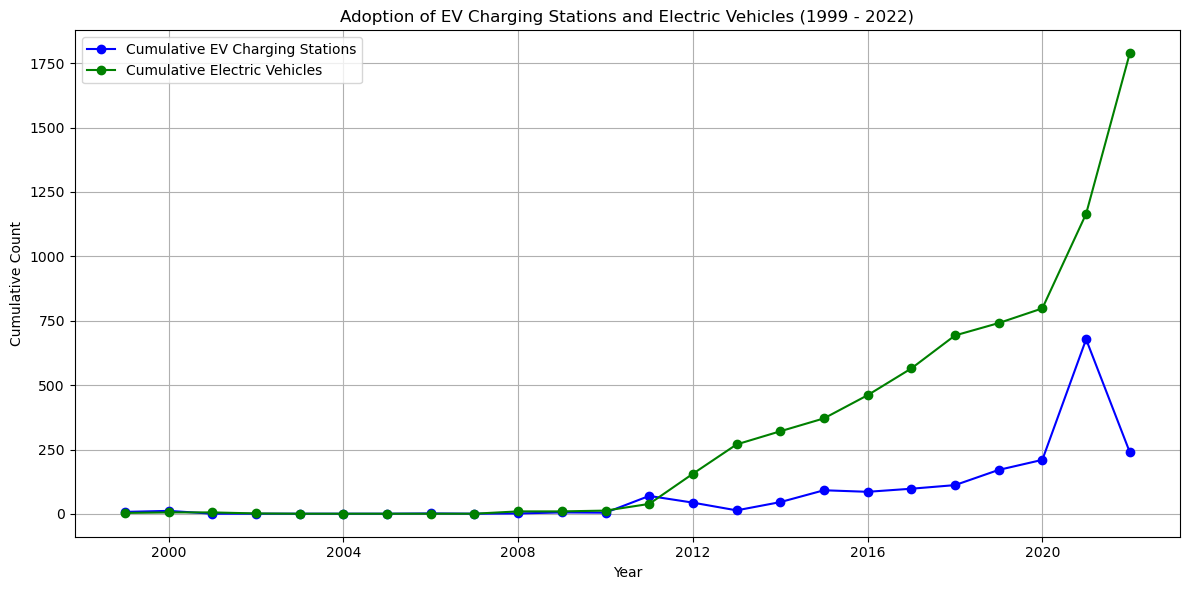

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to CSV files
charging_stations_file = 'resources/EV_Alternative_Fuel_Charging_Stations.csv'
vehicles_file = 'resources/Electric_Vehicle_Population_Data.csv'
sqlite_database = "sqlite:///Resources/Project3.sqlite"

# Read CSV files into Pandas DataFrames
df_stations = pd.read_csv(charging_stations_file)
df_vehicles = pd.read_csv(vehicles_file)

# Convert dates to datetime
df_stations['Open_Date'] = pd.to_datetime(df_stations['Open_Date'])
df_vehicles['Model_Year'] = pd.to_datetime(df_vehicles['Model_Year'], format='%Y')

# Filter records from 1999 to 2022
start_date = pd.Timestamp('1999-01-01')
end_date = pd.Timestamp('2022-12-31')

df_stations_filtered = df_stations[(df_stations['Open_Date'] >= start_date) & (df_stations['Open_Date'] <= end_date)]
df_vehicles_filtered = df_vehicles[(df_vehicles['Model_Year'] >= start_date) & (df_vehicles['Model_Year'] <= end_date)]

# Sort the filtered data
df_stations_filtered = df_stations_filtered.sort_values('Open_Date')
df_vehicles_filtered = df_vehicles_filtered.sort_values('Model_Year')

# Cumulative counts
df_stations_filtered['Cumulative_Stations'] = df_stations_filtered.groupby(df_stations_filtered['Open_Date'].dt.year).cumcount() + 1
df_vehicles_filtered['Cumulative_Vehicles'] = df_vehicles_filtered.groupby(df_vehicles_filtered['Model_Year'].dt.year).cumcount() + 1

# Resample data to ensure all years within the range have data points
df_stations_resampled = df_stations_filtered.set_index('Open_Date').resample('AS').max().fillna(method='ffill')
df_vehicles_resampled = df_vehicles_filtered.set_index('Model_Year').resample('AS').max().fillna(method='ffill')

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for cumulative EV charging stations
plt.plot(df_stations_resampled.index, df_stations_resampled['Cumulative_Stations'], color='blue', marker='o', linestyle='-', label='Cumulative EV Charging Stations')

# Line plot for cumulative electric vehicles
plt.plot(df_vehicles_resampled.index, df_vehicles_resampled['Cumulative_Vehicles'], color='green', marker='o', linestyle='-', label='Cumulative Electric Vehicles')

# Formatting plot
plt.title('Adoption of EV Charging Stations and Electric Vehicles (1999 - 2022)')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.legend(loc='upper left')

# Display plot
plt.tight_layout()
plt.show()


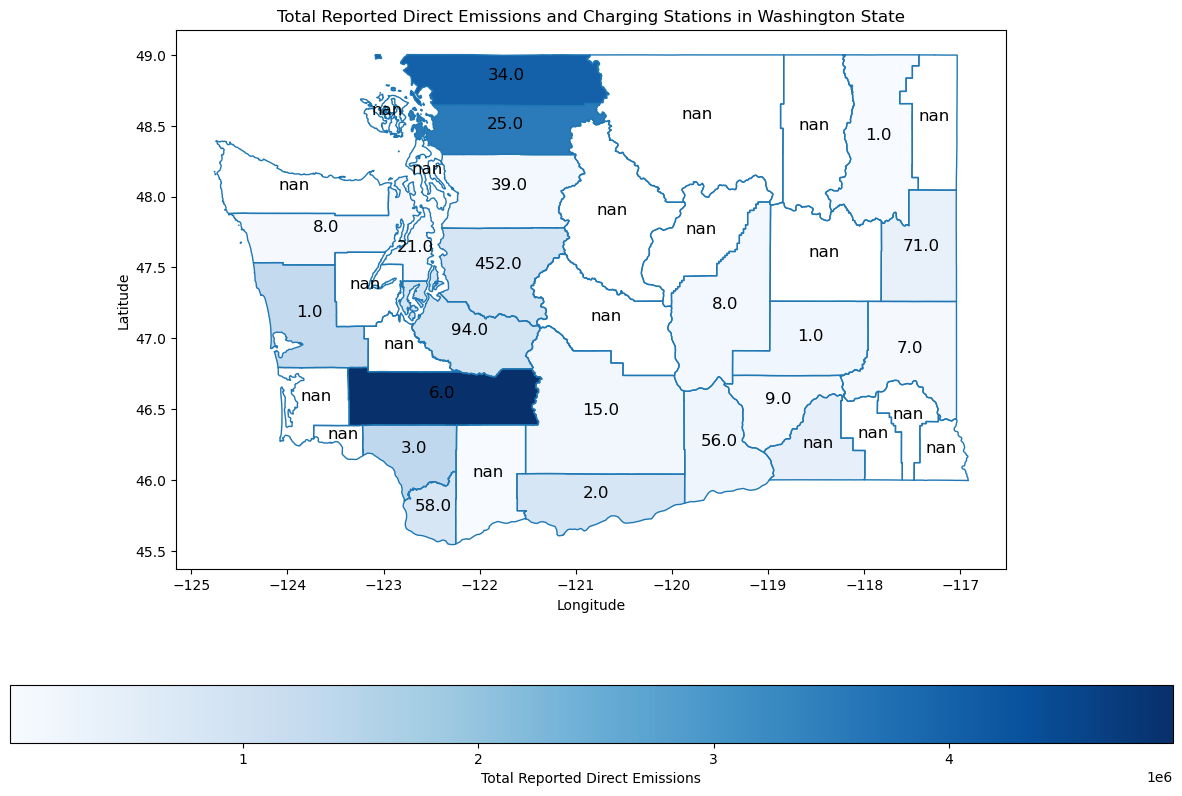

In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import zipfile

# Load the datasets
ghgp_data = pd.read_csv('resources/ghgp_data_carbon_2022.csv')
ev_data = pd.read_csv('resources/EV_Alternative_Fuel_Charging_Stations.csv')

# Convert `Total_reported_direct_emissions` to floats
ghgp_data['Total_reported_direct_emissions'] = ghgp_data['Total_reported_direct_emissions'].astype(float)

# Aggregate the total number of charging stations per city
ev_data_city = ev_data.groupby('City').size().reset_index(name='Charging_Stations_Count')

# Extract city and county mapping from the GHGP data
city_county_mapping = ghgp_data[['City', 'County']].drop_duplicates()

# Merge the city count with the county mapping to get county-based charging station counts
ev_data_with_county = pd.merge(ev_data_city, city_county_mapping, left_on='City', right_on='City', how='left')

# Now aggregate the charging stations count per county
ev_data_aggregated = ev_data_with_county.groupby('County')['Charging_Stations_Count'].sum().reset_index()

# Aggregate total reported direct emissions by county
emissions_data_aggregated = ghgp_data.groupby('County')['Total_reported_direct_emissions'].sum().reset_index()

# Merge the emissions data with the aggregated EV charging stations data on county
merged_data = pd.merge(emissions_data_aggregated, ev_data_aggregated, on='County', how='left')

# Downloading US counties shapefile
url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip'
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    z.extractall('resources/us_counties')

# Load the shapefile into a GeoDataFrame
us_counties = gpd.read_file('resources/us_counties/cb_2018_us_county_500k.shp')

# Filter for Washington state (FIPS code: 53)
wa_counties = us_counties[us_counties['STATEFP'] == '53'].copy()

# Merge the shapefile GeoDataFrame with our emissions and charging stations data
wa_counties.loc[:, 'County'] = wa_counties['NAME']
merged_gdf = wa_counties.merge(merged_data, on='County', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
wa_counties.boundary.plot(ax=ax, linewidth=1)
merged_gdf.plot(column='Total_reported_direct_emissions', ax=ax, legend=True,
                legend_kwds={'label': "Total Reported Direct Emissions",
                             'orientation': "horizontal"},
                cmap='Blues')

# Plot charging stations as text
for idx, row in merged_gdf.iterrows():
    plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y, 
             row['Charging_Stations_Count'], fontsize=12, ha='center')

plt.title('Total Reported Direct Emissions and Charging Stations in Washington State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()